<a href="https://colab.research.google.com/github/stacy400/AI_week1/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()



Saving Age-standardized suicide rates.csv to Age-standardized suicide rates.csv


In [3]:
import pandas as pd
df = pd.read_csv('Age-standardized suicide rates.csv')
print(df.head())


       Country          Sex  2016  2015  2010  2000
0  Afghanistan   Both sexes   6.4   6.6   7.4   8.1
1  Afghanistan         Male  10.6  10.9  12.5  14.3
2  Afghanistan       Female   2.1   2.1   2.1   1.7
3      Albania   Both sexes   5.6   5.3   7.7   5.8
4      Albania         Male   7.0   6.7   9.5   8.2


In [6]:
# Melt the year columns into two columns: 'Year' and 'Suicide Rate'
df_long = df.melt(id_vars=['Country', 'Sex'],
                  var_name='Year',
                  value_name='Suicide Rate')

# Convert Year to numeric
df_long['Year'] = pd.to_numeric(df_long['Year'])
print(df_long.tail(5))

       Country          Sex  Year  Suicide Rate
2191    Zambia         Male  2000          21.9
2192    Zambia       Female  2000           7.5
2193  Zimbabwe   Both sexes  2000          21.7
2194  Zimbabwe         Male  2000          35.5
2195  Zimbabwe       Female  2000           9.8


In [12]:
df_long = df_long.dropna()

In [8]:
X = df_long[['Country', 'Sex', 'Year']]
y = df_long['Suicide Rate']

# Encode categorical variables (Country & Sex)
X = pd.get_dummies(X, drop_first=True)

print(X.head(2))


   Year  Country_Albania  Country_Algeria  Country_Angola  \
0  2016            False            False           False   
1  2016            False            False           False   

   Country_Antigua and Barbuda  Country_Argentina  Country_Armenia  \
0                        False              False            False   
1                        False              False            False   

   Country_Australia  Country_Austria  Country_Azerbaijan  ...  \
0              False            False               False  ...   
1              False            False               False  ...   

   Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
0            False               False            False   
1            False               False            False   

   Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                       False             False   
1                                       False             False   

   Country_Yemen  Country_

In [9]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 27.04383004024495
R² Score: 0.6994922199503479


In [11]:
#predicting suicide rate by 2020
new_data = pd.DataFrame([{
    'Country': 'Albania',
    'Sex': 'Male',
    'Year': 2020
}])

# Encode new data using same dummy structure
new_data_encoded = pd.get_dummies(new_data, drop_first=True).reindex(columns=X.columns, fill_value=0)

prediction = model.predict(new_data_encoded)
print("Predicted Suicide Rate:", prediction[0])


Predicted Suicide Rate: 5.5938669712529645


In [13]:
#Train Model — Using Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MAE: {mae:.2f}")
print(f"Decision Tree MSE: {mse:.2f}")
print(f"Decision Tree R² Score: {r2:.2f}")


Decision Tree MAE: 1.85
Decision Tree MSE: 12.08
Decision Tree R² Score: 0.87


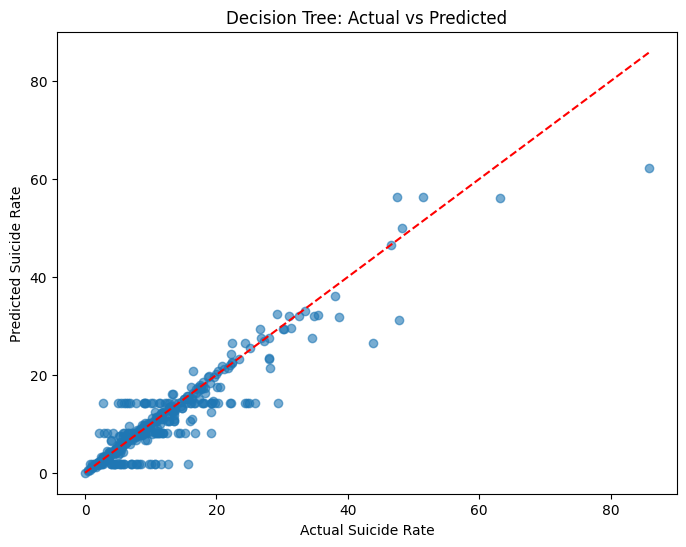

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.6)
plt.xlabel('Actual Suicide Rate')
plt.ylabel('Predicted Suicide Rate')
plt.title('Decision Tree: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
